In this notebook I will be exploring the NBADATA.csv file, and trying to identify the relevant statistics for modelling. This will be split into two sections. 


1. Which stats are the most correlated to victory? 
    By looking at all of these box scores, we can see what the game's final point differential (+/-) was. Using this as an output along with all of the box score statistics, we can infer which values are the most correlated to it, along with other useful takeaways to be described concurrently with the study. 
    

2. How many games are sufficient for lookback? 
    Obviously we cannot use the ingame data for prediction purposes, so some sort of lookback prediction proxy must be used. In order to capture what the teams expected performance will be in the game for prediction, a lookback window will be used over the previous x games to serve as that team's forecasted stats. I will try to identify how many games of lookback is the best for this purpose. 

In [1]:
#import dependencies, and dataset. 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



In [2]:
filename = 'NBADATA.csv'

nba_dataset = pd.read_csv('NBADATA.csv')

In [3]:
nba_dataset.head()

,Unnamed: 0,GAME_ID,Date,Team,Home,Away,FG,FGA,3P,3PA,...,AST,PF,ST,TO,BL,PTS,SPREAD,PLUS_MINUS,OU,TOTAL
0,4,21300001,10/29/13,Orlando Magic,0,1,36,93,9,19,...,17,26,10,17,6,87,12.0,-10,U,189.5
1,5,21300001,10/29/13,Indiana Pacers,1,0,34,71,7,17,...,17,13,4,20,18,97,-12.0,10,U,189.5
2,1,21300002,10/29/13,Chicago Bulls,0,1,35,83,7,26,...,23,27,11,18,4,95,5.0,-12,O,188.0
3,0,21300002,10/29/13,Miami Heat,1,0,37,72,11,20,...,26,21,10,18,7,107,-5.0,12,O,188.0
4,3,21300003,10/29/13,Los Angeles Clippers,0,1,41,83,8,21,...,27,21,11,16,4,103,-9.5,-13,O,201.5


# Exploratory Analysis

Just want the basic box score stuff here, see if generic box score things contribute to the PLUS_MINUS category, which corresponds to the final point differential of the game. As a sanity check, the spread should play one of the biggest roles, as vegas bookmakers are smart and typically keep it close. 

In [4]:
#delete irrelevant columns (for this section), they will be useful for other pieces of the study but not here!
nba_explore = nba_dataset
del nba_explore['Unnamed: 0'],nba_explore['GAME_ID'],nba_explore['Date'],nba_explore['Team'],nba_explore['Home'],nba_explore['Away']
del nba_explore['OU'],nba_explore['TOTAL']

#add some other potential columns, like efficency. 
nba_explore['3P%'] = np.divide(nba_explore['3P'].values,nba_explore['3PA'].values) 

nba_explore['FG%'] = np.divide(nba_explore['FG'].values,nba_explore['FGA'].values)
nba_explore['FT%'] = np.divide(nba_explore['FT'].values,nba_explore['FTA'].values)
nba_explore['TRB']  = nba_explore['OR'] + nba_explore['DR']

nba_explore['AST/TO'] = np.divide(nba_explore['AST'].values,nba_explore['TO'].values)


relevant_stats = []
for col in nba_explore.columns:
    if col != 'PLUS_MINUS':
        print(col + " Correlation to Outcome")
        corr = np.corrcoef(nba_explore[col],nba_explore['PLUS_MINUS'])
        print(corr[0][1])
        if abs(corr[0][1]) < .1:
            pass
        else:
            relevant_stats.append(col)
        


FG Correlation to Outcome
0.503997991165
FGA Correlation to Outcome
-0.000850904870708
3P Correlation to Outcome
0.330232588337
3PA Correlation to Outcome
0.0879946317693
FT Correlation to Outcome
0.110525621062
FTA Correlation to Outcome
0.0682632854309
OR Correlation to Outcome
-0.0280868972788
DR Correlation to Outcome
0.419821151912
AST Correlation to Outcome
0.409512742091
PF Correlation to Outcome
-0.0607043277291
ST Correlation to Outcome
0.165059256663
TO Correlation to Outcome
-0.131423640983
BL Correlation to Outcome
0.196087441626
PTS Correlation to Outcome
0.567488838081
SPREAD Correlation to Outcome
-0.493897887864
3P% Correlation to Outcome
0.389249598123
FG% Correlation to Outcome
0.548656258878
FT% Correlation to Outcome
0.127611348862
TRB Correlation to Outcome
0.328001312084
AST/TO Correlation to Outcome
0.304760416223


In [5]:
relevant_stats

['FG',
 '3P',
 'FT',
 'DR',
 'AST',
 'ST',
 'TO',
 'BL',
 'PTS',
 'SPREAD',
 '3P%',
 'FG%',
 'FT%',
 'TRB',
 'AST/TO']

In [6]:
nba_dataset.corr()

,FG,FGA,3P,3PA,FT,FTA,OR,DR,AST,PF,...,TO,BL,PTS,SPREAD,PLUS_MINUS,3P%,FG%,FT%,TRB,AST/TO
FG,1.000000,0.444209,0.334184,0.122359,-0.177459,-0.185521,0.002563,0.120240,0.637652,0.046989,...,-0.136763,0.068828,0.835230,-0.203610,0.503998,0.356850,0.768196,-0.003602,0.100234,0.427171
FGA,0.444209,1.000000,0.101679,0.273002,-0.217073,-0.216731,0.507819,0.161278,0.210786,0.073077,...,-0.264922,0.040596,0.288826,0.038986,-0.000851,-0.133214,-0.227138,-0.036549,0.433659,0.300441
3P,0.334184,0.101679,1.000000,0.749872,-0.099537,-0.113304,-0.128657,0.083404,0.418478,0.031579,...,-0.004232,0.007564,0.520055,-0.174631,0.330233,0.681578,0.289437,0.019224,-0.007851,0.218661
3PA,0.122359,0.273002,0.749872,1.000000,-0.083545,-0.089859,0.009022,0.107152,0.230831,0.044994,...,-0.013091,0.000857,0.279773,-0.135862,0.087995,0.067954,-0.062288,0.004973,0.093322,0.129605
FT,-0.177459,-0.217073,-0.099537,-0.083545,1.000000,0.923085,0.055629,0.046356,-0.149466,0.200560,...,0.026892,0.019440,0.319561,-0.123251,0.110526,-0.058931,-0.035801,0.330155,0.071059,-0.097264
FTA,-0.185521,-0.216731,-0.113304,-0.089859,0.923085,1.000000,0.098308,0.050232,-0.160410,0.215601,...,0.036170,0.020928,0.270780,-0.106170,0.068263,-0.073149,-0.044652,-0.033373,0.099559,-0.110783
OR,0.002563,0.507819,-0.128657,0.009022,0.055629,0.098308,1.000000,-0.026617,-0.107421,0.057712,...,0.046587,0.005221,-0.008119,0.020445,-0.028087,-0.201221,-0.354446,-0.095026,0.571380,-0.090309
DR,0.120240,0.161278,0.083404,0.107152,0.046356,0.050232,-0.026617,1.000000,0.121534,-0.032583,...,0.121116,0.209283,0.146641,-0.196475,0.419821,0.010582,0.016529,0.005361,0.805187,-0.029465
AST,0.637652,0.210786,0.418478,0.230831,-0.149466,-0.160410,-0.107421,0.121534,1.000000,-0.014028,...,-0.028500,0.090471,0.574918,-0.221625,0.409513,0.367745,0.540861,0.007619,0.036051,0.541952
PF,0.046989,0.073077,0.031579,0.044994,0.200560,0.215601,0.057712,-0.032583,-0.014028,1.000000,...,0.163646,-0.003494,0.147353,0.122567,-0.060704,0.004598,0.001751,-0.004753,0.007486,-0.125244


In [7]:
def plot_corr(df,size=20):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
   # ax.set_legend()
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.legend()

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


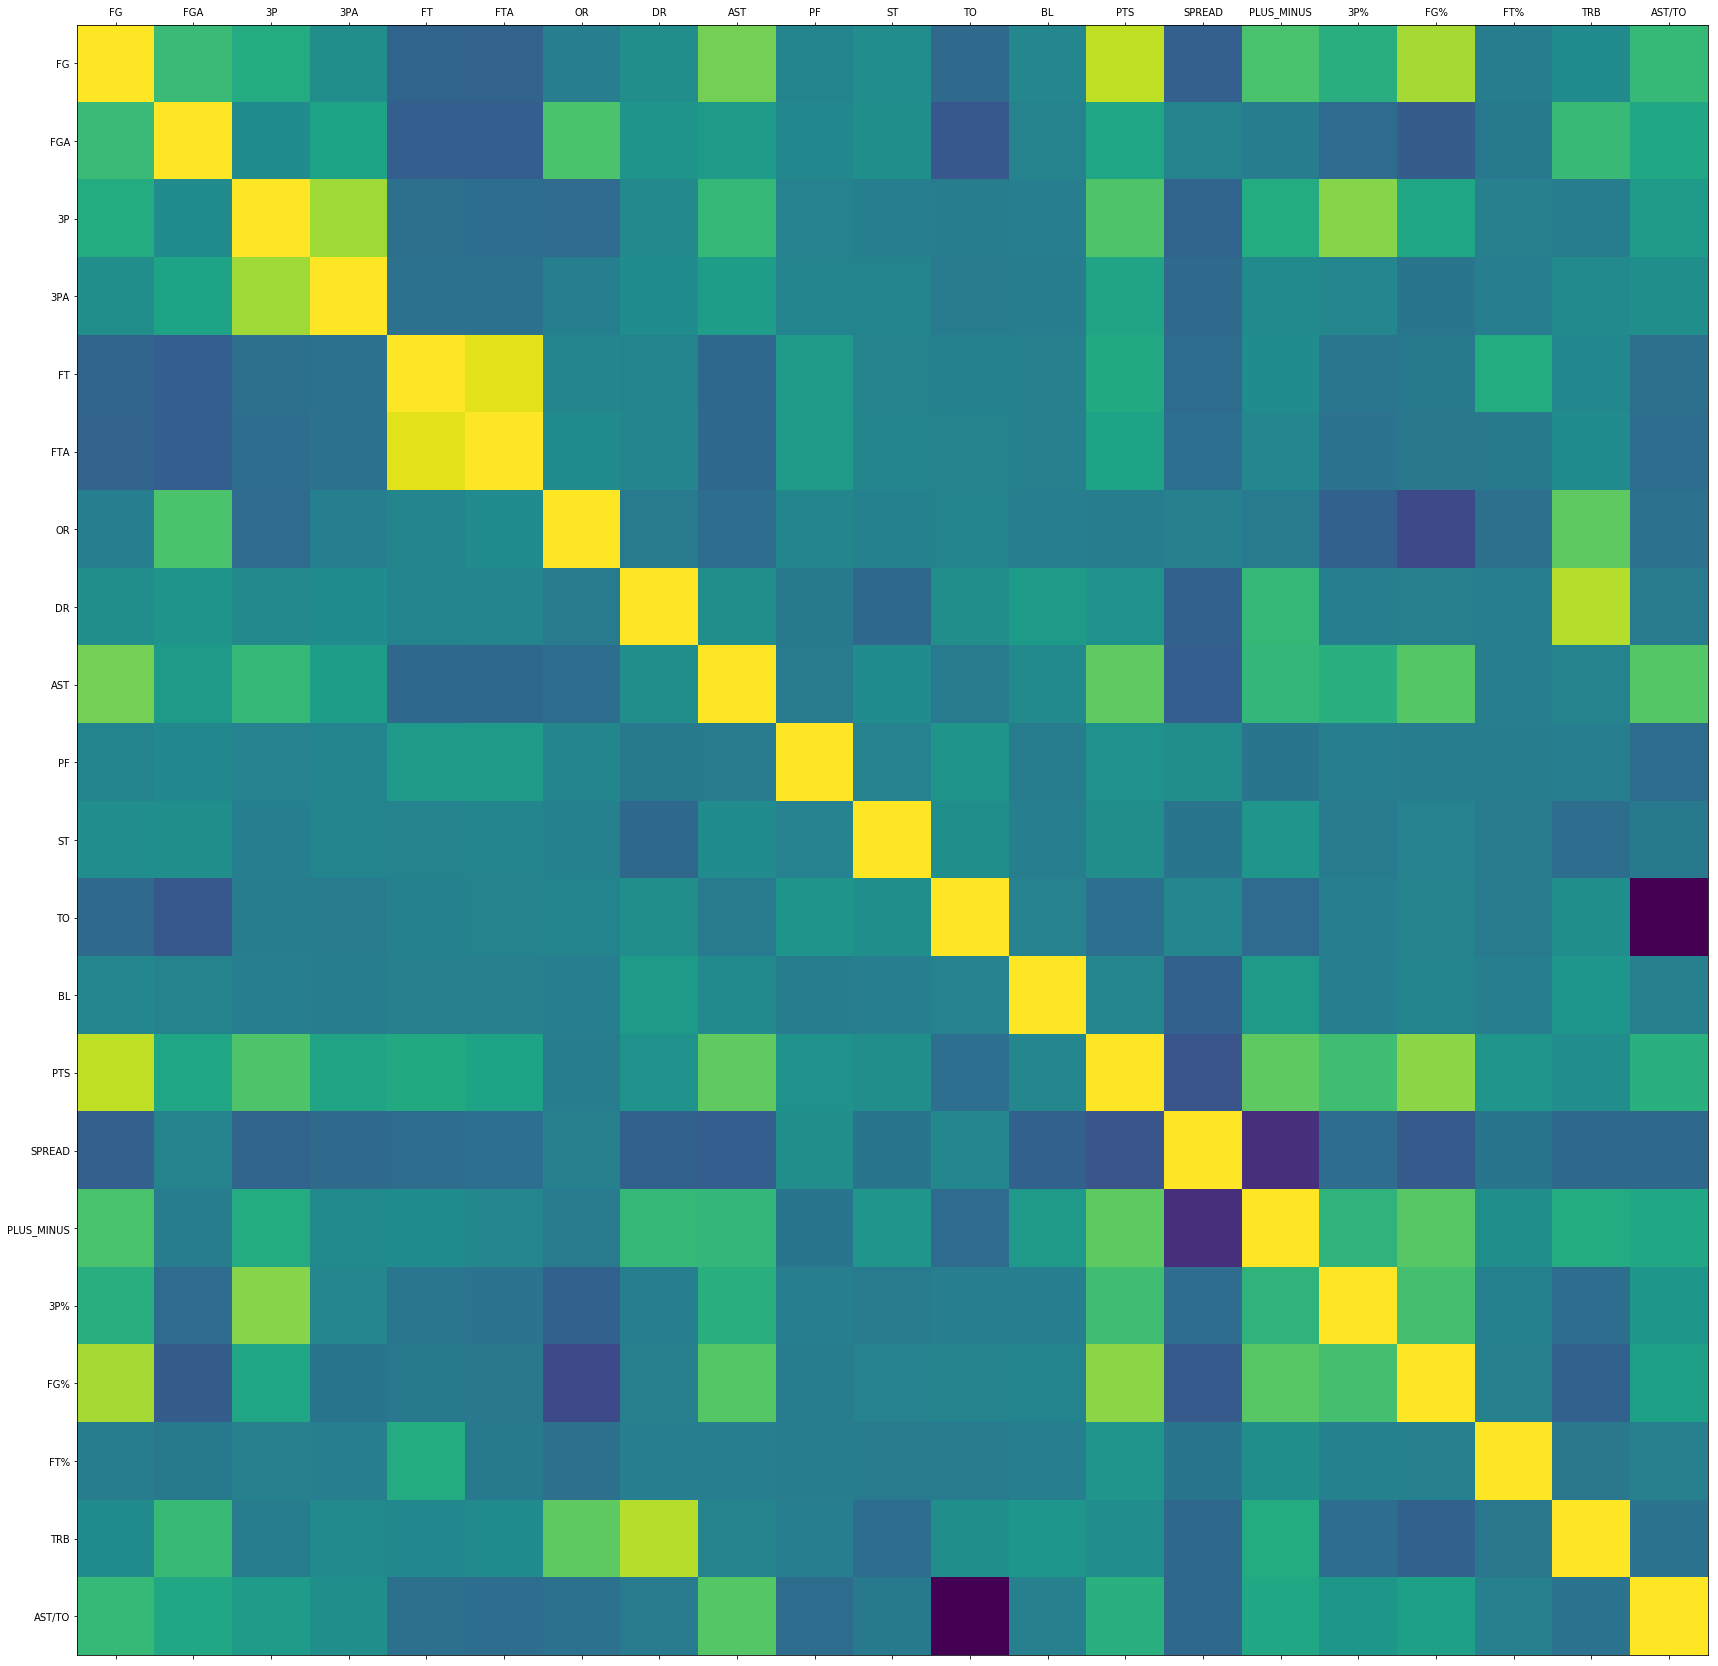

In [8]:
plot_corr(nba_explore,size=30)


So now I've identified which stats I want to proceed with. The next step is to determine the optimal lookback window size. This will be based on a summed correlation coeffecient, by trying to study the correlation of statistic x with that team's previous y game average with statistic x, and determine which window size fits best. 

Out of convenience, I'm still working with one team at a time, and summing up over all. To be explained better below!

In [9]:
#reread in the data, really not sure why deleting the cols from one dataset deletes it from all others. 
nba_dataset = pd.read_csv('NBADATA.csv')

In [10]:
def rolling_correlations(data,ngames):
    """Determines the correlation between a team's performance in a
    particular category compared to that team's split average over the previous ngames. 
    Use this function to determine optimal lookback period. 
    
    data : df
        Dataframe containing all the box scores over previous 5 season. 
        
    ngames : int
        Lookback splits. Ex: ngames=5 corresponds to team's splits over previous 5 games. 
    """
#delete irrelevant columns (for this section), they will be useful for other pieces of the study but not here!
    nba_explore = pd.read_csv('NBADATA.csv')
    del nba_explore['Unnamed: 0'],nba_explore['GAME_ID'],nba_explore['Date'],nba_explore['Team'],nba_explore['Home'],nba_explore['Away']
    del nba_explore['OU'],nba_explore['TOTAL']

#add some other potential columns, like efficency. 
    nba_explore['3P%'] = np.divide(nba_explore['3P'].values,nba_explore['3PA'].values) 

    nba_explore['FG%'] = np.divide(nba_explore['FG'].values,nba_explore['FGA'].values)
    nba_explore['FT%'] = np.divide(nba_explore['FT'].values,nba_explore['FTA'].values)
    nba_explore['TRB']  = nba_explore['OR'] + nba_explore['DR']

    nba_explore['AST/TO'] = np.divide(nba_explore['AST'].values,nba_explore['TO'].values)


    relevant_stats = []
    for col in nba_explore.columns:
        if col != 'PLUS_MINUS':
           # print(col + " Correlation to Outcome")
            corr = np.corrcoef(nba_explore[col],nba_explore['PLUS_MINUS'])
            #print(corr[0][1])
            if abs(corr[0][1]) < .1:
                pass
            else:
                relevant_stats.append(col)
        

    print("Using a window of " ,ngames, " games. ")
    data['AST/TO'] = np.divide(data['AST'].values,data['TO'].values)
    data['3P%'] = np.divide(data['3P'].values,data['3PA'].values) 
    data['FG%'] = np.divide(data['FG'].values,data['FGA'].values)
    data['FT%'] = np.divide(data['FT'].values,data['FTA'].values)
    del data['Unnamed: 0'],data['TOTAL']
   # del data['Date']
    data = data.loc[data['GAME_ID'].values < 41300001] #genius! No playoff games now :)   
    #del data['Team'] 
    #data = pd.get_dummies(data) #sometimes option to hot tcode team, but not yet. Seems like overfitting. 
    teams = data.Team.unique() #each nba team. 
#iterate over those teams, make a rolling window
    nba_data = pd.DataFrame([])
    season_ids = []
    for i,val in enumerate(data['GAME_ID'].values):  #loop through every game
        season_ids.append(str(val)[1:3])

    data['Season_ID'] = season_ids #identify the unique seasons. 

    for team in teams:  #for each team
       # print(team)
    #get separate seasons here
        team_data = data.loc[data['Team'] == team]  #this contains the box score of every team game from 2013 to 2018.
        for season in data['Season_ID'].unique(): #this contains the box score of that team for that season. 
            #print(season)
            team_season = team_data.loc[team_data['Season_ID'] == season]
        
            stuff_to_turn_into_avgs =  relevant_stats  #['OR', 'DR', 'TOT', 'PF', 'ST', 'TO', 'BL', '3P%', 'FG%', 'FT%']
            for col in team_season.columns:
                if col in stuff_to_turn_into_avgs:
                        team_season['Rolling ' + col] = team_season[col].rolling(window=ngames).mean().shift(1)

            #split each season up here, 
                    #if col != 'PTS':
                    #    team_season['Rolling ' + col] = team_season[col].rolling(window=N_GAMES).mean().shift(1)

                        del team_season[col]
                    
            nba_data =  nba_data.append(team_season)

           # df = pd.concat([road_df,home_df],axis=1)
#reorganize the dataset. 
    nba_data_splits = nba_data.sort_values(by = ['GAME_ID', 'Home','Away'], ascending=[True, True,False])

    nba_data_splits.dropna(inplace=True)

    del nba_data_splits['Home'], nba_data_splits['Away'], nba_data_splits['FGA'], nba_data_splits['3PA'], nba_data_splits['FTA'], nba_data_splits['OR'],nba_data_splits['PF']                                                                                                                                
    del nba_data_splits['PLUS_MINUS'], nba_data_splits['OU'],nba_data_splits['Rolling SPREAD'],nba_data_splits['Season_ID']
    nba_dataset = pd.read_csv('NBADATA.csv')                                                                                                               
    rolling_vals = nba_data_splits
  #  print(rolling_vals.head())
    game_vals = nba_dataset
    merged = game_vals.merge(rolling_vals,on=['GAME_ID','Team'])
    print(rolling_vals.columns)
#   del merged['GAME_ID'],merged['Team'],merged['Home'],merged['Away'],merged['SPREAD']
  #  print("do dates align? ")
 #   print(merged[['Date_x','Date_y']].values[0:10])
    total_corr = 0
    for col in merged:
        try:
            corr = np.corrcoef(merged[col],merged['Rolling ' + col])[0][1]
            #print(col)
            #print(corr)
            total_corr += abs(corr)
        except:
            pass
    return total_corr

In [11]:
ngames = [1,3,5,10,15,22,30,40,50,60,75,81]
ngame_corrs = []
for lookback in ngames:
    nba_dataset = pd.read_csv('NBADATA.csv')
    total_corr = rolling_correlations(nba_dataset,lookback)
    print("Total Correlation = ", total_corr)
    ngame_corrs.append(total_corr)
  

Using a window of  1  games. 


/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyboardInterrupt: 

In [ ]:
plt.style.use('fivethirtyeight')
  
plt.title('Correlation Between Splits and in Game Box Score')   
plt.xlabel('N Games')
plt.ylabel('Correlation')
plt.plot(ngames,ngame_corrs,'bo--')

# Going to stop here for the day. The next step is combing the rolling columns here with the relevant stats of the previous one, make sure the game_ids are aligned, and confirm some sense of correlation between the two. Generalize it enough so it can be done for an arbitrary window size to compare these, and also maybe see if these columns still posess a correlaiton to the outcome as well? After all that is the point of this study. 

In [ ]:
ngames[ngame_corrs.index(max(ngame_corrs))]

In [12]:
def create_dataset(data,ngames):
    """Using all the other information acquired above, create the datset using the relevant categories stated. 
    
     data : dataframe
         The NBADATA dataframe. 
    """
    nba_explore = pd.read_csv('NBADATA.csv')
    del nba_explore['Unnamed: 0'],nba_explore['GAME_ID'],nba_explore['Date'],nba_explore['Team'],nba_explore['Home'],nba_explore['Away']
    del nba_explore['OU'],nba_explore['TOTAL']

#add some other potential columns, like efficency. 
    nba_explore['3P%'] = np.divide(nba_explore['3P'].values,nba_explore['3PA'].values) 

    nba_explore['FG%'] = np.divide(nba_explore['FG'].values,nba_explore['FGA'].values)
    nba_explore['FT%'] = np.divide(nba_explore['FT'].values,nba_explore['FTA'].values)
    nba_explore['TRB']  = nba_explore['OR'] + nba_explore['DR']

    nba_explore['AST/TO'] = np.divide(nba_explore['AST'].values,nba_explore['TO'].values)


    relevant_stats = []
    for col in nba_explore.columns:
        if col != 'PLUS_MINUS':
           # print(col + " Correlation to Outcome")
            corr = np.corrcoef(nba_explore[col],nba_explore['PLUS_MINUS'])
            #print(corr[0][1])
            if abs(corr[0][1]) < .1:
                pass
            else:
                relevant_stats.append(col)
        

    data['AST/TO'] = np.divide(data['AST'].values,data['TO'].values)
    data['3P%'] = np.divide(data['3P'].values,data['3PA'].values) 
    data['FG%'] = np.divide(data['FG'].values,data['FGA'].values)
    data['FT%'] = np.divide(data['FT'].values,data['FTA'].values)
    del data['Unnamed: 0'],data['TOTAL']
   # del data['Date']
    data = data.loc[data['GAME_ID'].values < 41300001] #genius! No playoff games now :)   
    #del data['Team'] 
    #data = pd.get_dummies(data) #sometimes option to hot tcode team, but not yet. Seems like overfitting. 
    teams = data.Team.unique() #each nba team. 
#iterate over those teams, make a rolling window
    nba_data = pd.DataFrame([])
    season_ids = []
    for i,val in enumerate(data['GAME_ID'].values):  #loop through every game
        season_ids.append(str(val)[1:3])

    data['Season_ID'] = season_ids #identify the unique seasons. 

    for team in teams:  #for each team
       # print(team)
    #get separate seasons here
        team_data = data.loc[data['Team'] == team]  #this contains the box score of every team game from 2013 to 2018.
        for season in data['Season_ID'].unique(): #this contains the box score of that team for that season. 
            #print(season)
            team_season = team_data.loc[team_data['Season_ID'] == season]
        
            stuff_to_turn_into_avgs =  relevant_stats  #['OR', 'DR', 'TOT', 'PF', 'ST', 'TO', 'BL', '3P%', 'FG%', 'FT%']
            for col in team_season.columns:
                if col in stuff_to_turn_into_avgs:
                        team_season['Rolling ' + col] = team_season[col].rolling(window=ngames).mean().shift(1)

            #split each season up here, 
                    #if col != 'PTS':
                    #    team_season['Rolling ' + col] = team_season[col].rolling(window=N_GAMES).mean().shift(1)

                        del team_season[col]
                    
            nba_data =  nba_data.append(team_season)

           # df = pd.concat([road_df,home_df],axis=1)
#reorganize the dataset. 
    nba_data_splits = nba_data.sort_values(by = ['GAME_ID', 'Home','Away'], ascending=[True, True,False])

    nba_data_splits.dropna(inplace=True)

    del nba_data_splits['FGA'], nba_data_splits['3PA'], nba_data_splits['FTA'], nba_data_splits['OR'],nba_data_splits['PF']                                                                                                                                
    del nba_data_splits['PLUS_MINUS'], nba_data_splits['OU'],nba_data_splits['Rolling SPREAD'],nba_data_splits['Season_ID']
    nba_dataset = pd.read_csv('NBADATA.csv')                                                                                                               
    rolling_vals = nba_data_splits
    
    
    return rolling_vals

In [13]:
data = pd.read_csv('NBADATA.csv')
rolling_vals = create_dataset(data,30)

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
spreads = pd.read_csv('NBADATA.csv')
spreads = spreads[['GAME_ID','SPREAD','Team']]

In [15]:
#spreads

In [16]:
test = rolling_vals.merge(spreads,on=['GAME_ID','Team'])

In [17]:
test.sort_values(by=['GAME_ID'])

,GAME_ID,Date,Team,Home,Away,Rolling FG,Rolling 3P,Rolling FT,Rolling DR,Rolling AST,Rolling ST,Rolling TO,Rolling BL,Rolling PTS,Rolling AST/TO,Rolling 3P%,Rolling FG%,Rolling FT%,SPREAD
0,21300275,4/8/14,San Antonio Spurs,0,1,41.033333,8.966667,17.366667,35.066667,25.966667,7.366667,14.200000,5.766667,108.400000,1.940596,0.401666,0.486488,0.814569,-7.0
1,21300275,4/8/14,Minnesota Timberwolves,1,0,39.166667,7.066667,22.633333,31.366667,24.500000,8.600000,13.600000,3.766667,108.033333,1.916725,0.333378,0.458320,0.766028,7.0
2,21300413,12/23/13,Utah Jazz,0,1,35.366667,6.066667,15.866667,29.166667,19.666667,7.166667,14.700000,4.900000,92.666667,1.518058,0.330579,0.430660,0.754741,6.5
3,21300424,12/26/13,Houston Rockets,1,0,37.833333,9.466667,21.333333,34.633333,20.900000,7.766667,16.233333,6.166667,106.466667,1.387903,0.354389,0.480004,0.699482,-7.5
4,21300426,12/26/13,Los Angeles Clippers,0,1,37.933333,8.000000,21.133333,32.600000,23.666667,8.300000,13.866667,4.600000,105.000000,1.805647,0.332414,0.466906,0.721228,4.5
5,21300428,12/27/13,Detroit Pistons,0,1,38.900000,6.400000,16.600000,30.066667,20.200000,9.000000,14.566667,5.300000,100.800000,1.495818,0.305121,0.453750,0.665598,-4.0
6,21300433,12/27/13,Utah Jazz,1,0,35.333333,6.233333,15.633333,29.033333,19.633333,7.100000,14.400000,4.966667,92.533333,1.541718,0.336766,0.431026,0.761408,-3.5
7,21300435,12/27/13,Golden State Warriors,1,0,38.500000,9.533333,16.033333,34.766667,22.500000,7.733333,16.733333,4.966667,102.566667,1.474916,0.404747,0.460122,0.728847,-6.5
8,21300439,12/28/13,Detroit Pistons,0,1,38.900000,6.266667,16.033333,29.966667,19.933333,9.000000,14.466667,5.333333,100.100000,1.486929,0.301880,0.450768,0.656002,3.5
9,21300440,12/28/13,Charlotte Hornets,0,1,34.466667,4.833333,18.400000,32.633333,19.366667,6.400000,12.600000,5.433333,92.166667,1.722615,0.317372,0.422401,0.718197,6.0


In [18]:
test = test.sort_values(by = ['GAME_ID', 'Home','Away'], ascending=[True, True,False])


In [19]:
from collections import Counter

counts = Counter(test['GAME_ID'].values)

test['GAME_ID'].values

vals = np.array(list(counts.values())) == 2

useable_games = np.array(list(counts.keys()))[vals]

In [20]:
useable_games = np.array(list(counts.keys()))[vals]

In [21]:
test

,GAME_ID,Date,Team,Home,Away,Rolling FG,Rolling 3P,Rolling FT,Rolling DR,Rolling AST,Rolling ST,Rolling TO,Rolling BL,Rolling PTS,Rolling AST/TO,Rolling 3P%,Rolling FG%,Rolling FT%,SPREAD
0,21300275,4/8/14,San Antonio Spurs,0,1,41.033333,8.966667,17.366667,35.066667,25.966667,7.366667,14.200000,5.766667,108.400000,1.940596,0.401666,0.486488,0.814569,-7.0
1,21300275,4/8/14,Minnesota Timberwolves,1,0,39.166667,7.066667,22.633333,31.366667,24.500000,8.600000,13.600000,3.766667,108.033333,1.916725,0.333378,0.458320,0.766028,7.0
2,21300413,12/23/13,Utah Jazz,0,1,35.366667,6.066667,15.866667,29.166667,19.666667,7.166667,14.700000,4.900000,92.666667,1.518058,0.330579,0.430660,0.754741,6.5
3,21300424,12/26/13,Houston Rockets,1,0,37.833333,9.466667,21.333333,34.633333,20.900000,7.766667,16.233333,6.166667,106.466667,1.387903,0.354389,0.480004,0.699482,-7.5
4,21300426,12/26/13,Los Angeles Clippers,0,1,37.933333,8.000000,21.133333,32.600000,23.666667,8.300000,13.866667,4.600000,105.000000,1.805647,0.332414,0.466906,0.721228,4.5
5,21300428,12/27/13,Detroit Pistons,0,1,38.900000,6.400000,16.600000,30.066667,20.200000,9.000000,14.566667,5.300000,100.800000,1.495818,0.305121,0.453750,0.665598,-4.0
6,21300433,12/27/13,Utah Jazz,1,0,35.333333,6.233333,15.633333,29.033333,19.633333,7.100000,14.400000,4.966667,92.533333,1.541718,0.336766,0.431026,0.761408,-3.5
7,21300435,12/27/13,Golden State Warriors,1,0,38.500000,9.533333,16.033333,34.766667,22.500000,7.733333,16.733333,4.966667,102.566667,1.474916,0.404747,0.460122,0.728847,-6.5
8,21300439,12/28/13,Detroit Pistons,0,1,38.900000,6.266667,16.033333,29.966667,19.933333,9.000000,14.466667,5.333333,100.100000,1.486929,0.301880,0.450768,0.656002,3.5
9,21300440,12/28/13,Charlotte Hornets,0,1,34.466667,4.833333,18.400000,32.633333,19.366667,6.400000,12.600000,5.433333,92.166667,1.722615,0.317372,0.422401,0.718197,6.0


In [22]:
#test.loc[test['GAME_ID'].values in useable_games]

In [23]:
len(useable_games)

3850

In [24]:
test.columns

Index(['GAME_ID', 'Date', 'Team', 'Home', 'Away', 'Rolling FG', 'Rolling 3P',
       'Rolling FT', 'Rolling DR', 'Rolling AST', 'Rolling ST', 'Rolling TO',
       'Rolling BL', 'Rolling PTS', 'Rolling AST/TO', 'Rolling 3P%',
       'Rolling FG%', 'Rolling FT%', 'SPREAD'],
      dtype='object')

In [25]:
clunky = pd.DataFrame([])
for col in test.columns:
    clunky[col] = test[col]  #how to assign the same columns, and values in it!

for i, row in enumerate(clunky.values):
    if row[0] not in useable_games:
        print(i)
        print('invalid')
        clunky = clunky.drop(index=i)

2
invalid
3
invalid
4
invalid
5
invalid
6
invalid
7
invalid
8
invalid
9
invalid
10
invalid
13
invalid
14
invalid
15
invalid
16
invalid
17
invalid
18
invalid
21
invalid
22
invalid
25
invalid
28
invalid
31
invalid
38
invalid
39
invalid
40
invalid
63
invalid
1560
invalid
1561
invalid
1562
invalid
1563
invalid
1564
invalid
1565
invalid
1566
invalid
1567
invalid
1568
invalid
1571
invalid
1572
invalid
1573
invalid
1574
invalid
1575
invalid
1588
invalid
1607
invalid
1610
invalid
1631
invalid
3120
invalid
3121
invalid
3122
invalid
3123
invalid
3124
invalid
3131
invalid
3132
invalid
3133
invalid
3134
invalid
3137
invalid
3138
invalid
3145
invalid
3146
invalid
3147
invalid
3150
invalid
3151
invalid
3152
invalid
3157
invalid
3158
invalid
3159
invalid
3168
invalid
3175
invalid
3176
invalid
3177
invalid
4682
invalid
4685
invalid
4686
invalid
4687
invalid
4688
invalid
4689
invalid
4698
invalid
4699
invalid
4700
invalid
4701
invalid
4702
invalid
4703
invalid
4704
invalid
4709
invalid
4710
invalid
471

In [26]:
len(clunky)

7700

In [27]:
nba_data  = clunky
nba_data_splits = nba_data.sort_values(by = ['GAME_ID', 'Home','Away'], ascending=[True, True,False])


In [28]:
#nba_data_splits

In [29]:
clunky.head()

,GAME_ID,Date,Team,Home,Away,Rolling FG,Rolling 3P,Rolling FT,Rolling DR,Rolling AST,Rolling ST,Rolling TO,Rolling BL,Rolling PTS,Rolling AST/TO,Rolling 3P%,Rolling FG%,Rolling FT%,SPREAD
0,21300275,4/8/14,San Antonio Spurs,0,1,41.033333,8.966667,17.366667,35.066667,25.966667,7.366667,14.200000,5.766667,108.400000,1.940596,0.401666,0.486488,0.814569,-7.0
1,21300275,4/8/14,Minnesota Timberwolves,1,0,39.166667,7.066667,22.633333,31.366667,24.500000,8.600000,13.600000,3.766667,108.033333,1.916725,0.333378,0.458320,0.766028,7.0
11,21300447,12/28/13,Utah Jazz,0,1,35.633333,6.366667,15.600000,29.066667,19.800000,7.300000,14.233333,5.033333,93.233333,1.563940,0.340005,0.434021,0.767087,14.5
12,21300447,12/28/13,Los Angeles Clippers,1,0,38.200000,8.000000,20.900000,32.800000,23.566667,8.300000,13.500000,4.633333,105.300000,1.909397,0.333049,0.465288,0.719054,-14.5
19,21300455,12/30/13,Dallas Mavericks,0,1,39.466667,8.533333,16.466667,30.700000,23.233333,9.533333,14.133333,4.700000,103.933333,1.840691,0.381000,0.469546,0.799961,4.0


In [30]:
#del nba_data_splits['GAME_ID'],nba_data_splits['Date']
#del nba_data_splits['Home'],nba_data_splits['Away'],nba_data_splits['Team']
 
    #
#Convert to the common box score already used. 

road_df = nba_data_splits.iloc[::2]
home_df = nba_data_splits.iloc[1::2]
for col in nba_data_splits.columns:
    road_df['road_' + col] = road_df[col]
    home_df['home_' + col] = home_df[col]
    
    del road_df[col],home_df[col]

home_df.reset_index(inplace=True)
road_df.reset_index(inplace=True)

#merged into a dataframe here. 
df = pd.concat([road_df,home_df],axis=1)
del df['index']

#create the dataset here. Can consider the spread, or winner. 
#at the moment only using a single classifier, that seems sufficient. A home team loss is synonymous with a road team win. 

#del df['road_PTS'], df['home_PTS'],df['home_SPREAD']

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
df.tail(n=700)

,road_GAME_ID,road_Date,road_Team,road_Home,road_Away,road_Rolling FG,road_Rolling 3P,road_Rolling FT,road_Rolling DR,road_Rolling AST,...,home_Rolling AST,home_Rolling ST,home_Rolling TO,home_Rolling BL,home_Rolling PTS,home_Rolling AST/TO,home_Rolling 3P%,home_Rolling FG%,home_Rolling FT%,home_SPREAD
3150,21700531,12/30/17,Miami Heat,0,1,36.533333,11.666667,14.666667,33.233333,20.766667,...,22.566667,7.300000,14.533333,4.500000,102.333333,1.644770,0.340943,0.452253,0.745667,1.5
3151,21700532,12/30/17,New York Knicks,0,1,40.233333,7.800000,15.866667,33.466667,23.066667,...,27.733333,7.533333,15.133333,4.633333,112.066667,1.962853,0.388080,0.496542,0.752886,-5.5
3152,21700533,12/30/17,Portland Trail Blazers,0,1,37.600000,8.900000,16.500000,34.666667,17.933333,...,24.866667,8.333333,15.100000,4.200000,104.833333,1.748839,0.383516,0.465107,0.771261,2.5
3153,21700534,12/30/17,Cleveland Cavaliers,0,1,39.766667,12.933333,18.333333,33.033333,23.900000,...,20.933333,9.066667,12.900000,4.366667,102.466667,1.778199,0.379978,0.445139,0.816767,2.5
3154,21700535,12/30/17,Memphis Grizzlies,0,1,35.633333,9.266667,16.433333,30.633333,21.033333,...,30.300000,8.666667,15.566667,8.433333,113.333333,2.055329,0.384170,0.505951,0.801016,-14.5
3155,21700536,12/30/17,Philadelphia 76ers,0,1,40.466667,10.733333,17.366667,36.666667,26.600000,...,23.500000,7.866667,14.666667,4.833333,108.733333,1.797897,0.369859,0.466717,0.755247,-7.0
3156,21700537,12/31/17,Chicago Bulls,0,1,39.233333,10.566667,12.933333,35.400000,23.866667,...,22.166667,7.366667,13.133333,4.000000,104.933333,1.829725,0.364790,0.460313,0.757392,-8.0
3157,21700538,12/31/17,Minnesota Timberwolves,0,1,40.666667,8.233333,19.366667,31.500000,23.000000,...,23.066667,7.800000,12.566667,4.766667,106.700000,1.921219,0.392676,0.478351,0.781464,3.0
3158,21700539,12/31/17,Brooklyn Nets,0,1,37.833333,12.066667,17.500000,35.366667,22.700000,...,22.000000,7.066667,13.233333,4.633333,103.500000,1.833318,0.379088,0.456587,0.770991,-9.5
3159,21700540,12/31/17,Los Angeles Lakers,0,1,40.300000,8.833333,16.433333,34.566667,22.766667,...,21.966667,9.333333,14.833333,4.833333,115.366667,1.594669,0.379279,0.466347,0.794038,-15.0


In [32]:
#df

#only retain the home flag, since we just care about the being home outcome since it aligns with home team spread
df['Home'] = df['home_Home']
df['GAME_ID'] = df['road_GAME_ID']
del df['road_GAME_ID'],df['home_GAME_ID'],df['road_Date'],df['home_Date']
del df['road_Away'],df['road_Home'],df['home_Away'],df['home_Home']

In [33]:
data = pd.read_csv('NBADATA.csv')
data = data[['GAME_ID','PLUS_MINUS','Home']]

In [34]:
df = df.merge(data,on=['GAME_ID','Home'])  #this is correct. #this is the +/- fp

#for the home team. 

In [35]:
df.columns

#remove the final extraneous columns. 

del df['road_Team'],df['home_Team'],df['GAME_ID']
del df['Home']
#df['Home Team Covers?'] = 

Quick brainstorm. This plus minus refers to the final point differential for the home team. If the point differential is smaller than the spread attributed to the home team, 

Ex. +- = -10. Means home team lost by 10. If spread was +11, then the team covere. Positive number

if +- = 24. If home spread was -26, they didn't cover spread negative number


so if +- plus spread >0, they covered. Else they didn/t 

In [36]:
df.columns

Index(['road_Rolling FG', 'road_Rolling 3P', 'road_Rolling FT',
       'road_Rolling DR', 'road_Rolling AST', 'road_Rolling ST',
       'road_Rolling TO', 'road_Rolling BL', 'road_Rolling PTS',
       'road_Rolling AST/TO', 'road_Rolling 3P%', 'road_Rolling FG%',
       'road_Rolling FT%', 'road_SPREAD', 'home_Rolling FG', 'home_Rolling 3P',
       'home_Rolling FT', 'home_Rolling DR', 'home_Rolling AST',
       'home_Rolling ST', 'home_Rolling TO', 'home_Rolling BL',
       'home_Rolling PTS', 'home_Rolling AST/TO', 'home_Rolling 3P%',
       'home_Rolling FG%', 'home_Rolling FT%', 'home_SPREAD', 'PLUS_MINUS'],
      dtype='object')

In [37]:
outcome = df['PLUS_MINUS'] #df['home_SPREAD'] + df['PLUS_MINUS'] 

In [38]:
y = []
for val in outcome:
    if val>0: 
        y.append(1) #home team wins. 
    else:
        y.append(0)

In [39]:
del df['PLUS_MINUS']

In [40]:
X = df

In [41]:
len(X)

3850

In [42]:
X.head()

,road_Rolling FG,road_Rolling 3P,road_Rolling FT,road_Rolling DR,road_Rolling AST,road_Rolling ST,road_Rolling TO,road_Rolling BL,road_Rolling PTS,road_Rolling AST/TO,...,home_Rolling AST,home_Rolling ST,home_Rolling TO,home_Rolling BL,home_Rolling PTS,home_Rolling AST/TO,home_Rolling 3P%,home_Rolling FG%,home_Rolling FT%,home_SPREAD
0,41.033333,8.966667,17.366667,35.066667,25.966667,7.366667,14.200000,5.766667,108.400000,1.940596,...,24.500000,8.6,13.600000,3.766667,108.033333,1.916725,0.333378,0.458320,0.766028,7.0
1,35.633333,6.366667,15.600000,29.066667,19.800000,7.300000,14.233333,5.033333,93.233333,1.563940,...,23.566667,8.3,13.500000,4.633333,105.300000,1.909397,0.333049,0.465288,0.719054,-14.5
2,39.466667,8.533333,16.466667,30.700000,23.233333,9.533333,14.133333,4.700000,103.933333,1.840691,...,23.433333,9.3,13.533333,2.866667,106.433333,1.954478,0.337522,0.429603,0.794908,-4.0
3,34.866667,5.033333,18.500000,33.233333,19.766667,6.333333,12.700000,5.366667,93.266667,1.742615,...,20.200000,7.3,14.366667,4.966667,93.133333,1.579379,0.346225,0.434064,0.771320,-2.5
4,39.000000,9.566667,15.866667,32.700000,25.800000,8.300000,14.600000,4.466667,103.433333,1.921392,...,18.666667,6.8,15.000000,4.566667,95.233333,1.347540,0.345794,0.454824,0.770221,-3.0


In [43]:
sum(y)/len(y)  



0.5903896103896104

The home team roughly wins 60% of the time. 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=False,test_size = .11)

In [48]:
X_test

,road_Rolling FG,road_Rolling 3P,road_Rolling FT,road_Rolling DR,road_Rolling AST,road_Rolling ST,road_Rolling TO,road_Rolling BL,road_Rolling PTS,road_Rolling AST/TO,...,home_Rolling AST,home_Rolling ST,home_Rolling TO,home_Rolling BL,home_Rolling PTS,home_Rolling AST/TO,home_Rolling 3P%,home_Rolling FG%,home_Rolling FT%,home_SPREAD
3426,42.033333,7.333333,18.933333,31.033333,22.500000,9.066667,10.533333,4.800000,110.333333,2.419817,...,23.800000,7.133333,13.366667,3.700000,107.300000,1.888706,0.354441,0.464406,0.790825,3.5
3427,38.500000,10.600000,16.033333,34.000000,21.200000,8.733333,13.533333,4.333333,103.633333,1.661623,...,20.833333,7.366667,14.433333,4.933333,100.100000,1.577781,0.350418,0.443441,0.795616,6.5
3428,40.100000,8.500000,15.133333,33.133333,21.166667,9.933333,12.633333,3.666667,103.833333,1.830254,...,26.866667,8.366667,13.233333,6.966667,113.000000,2.143567,0.350407,0.474562,0.782770,-1.0
3429,38.633333,8.466667,14.900000,34.300000,21.900000,7.266667,12.900000,4.866667,100.633333,1.898861,...,21.966667,6.300000,14.700000,3.566667,102.333333,1.618280,0.341692,0.442328,0.771517,10.5
3430,38.000000,11.266667,17.233333,31.000000,24.766667,7.233333,14.566667,4.733333,104.500000,1.795606,...,22.933333,6.933333,13.800000,4.733333,104.066667,1.763150,0.326909,0.458026,0.776695,2.0
3431,40.200000,7.666667,15.833333,33.966667,22.600000,6.866667,14.066667,6.100000,103.900000,1.747583,...,22.266667,8.066667,12.333333,6.300000,111.100000,1.996911,0.346076,0.454125,0.799160,-14.0
3432,38.133333,12.000000,13.300000,35.100000,21.833333,6.733333,13.066667,4.766667,101.566667,1.894630,...,25.833333,8.066667,13.900000,4.500000,108.466667,1.996288,0.363227,0.477189,0.745009,2.0
3433,39.166667,10.066667,19.366667,34.700000,21.366667,7.366667,11.766667,4.800000,107.766667,2.098146,...,19.966667,7.000000,12.666667,4.933333,105.933333,1.681987,0.380868,0.467404,0.787953,-3.0
3434,38.166667,11.566667,14.200000,32.033333,22.733333,7.166667,10.533333,3.833333,102.100000,2.416350,...,29.800000,7.800000,15.166667,7.400000,113.100000,2.107854,0.379059,0.505236,0.800769,-14.5
3435,41.933333,10.266667,16.566667,32.900000,21.400000,8.766667,12.900000,5.200000,110.700000,1.844605,...,23.833333,8.266667,14.566667,4.266667,107.466667,1.773547,0.336433,0.458244,0.678764,-1.0


Now prior to normalizing, create a separate var that holds onto all of the spreads for the home teams in the testing games. 

In [49]:
test_spreads = X_test['home_SPREAD']

In [50]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC
model = MLPClassifier()

#model.fit(X_train,y_train)



In [52]:
from sklearn.model_selection import cross_val_score

In [57]:
scores = cross_val_score(model, X_train, y_train, cv=5)

In [58]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.68 (+/- 0.08)


In [ ]:
model.score(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

Now to compare: 

In [ ]:
predictions = model.predict(X_test)


for i,prediction in enumerate(predictions):
   # print("Prediction: ", prediction)
    #print("Spread of the home team for this game: ", test_spreads.values[i])
    
    if test_spreads.values[i] > 0 and prediction ==1:
        print("Picked a home team underdog")
        
    if test_spreads.values[i] < 0 and prediction ==0:
        print("Picked a away team underdog")

This is a good time to note this seems to very rarely pick underdogs, but more often it does on the road.  -- OK now the model picks the opposite, let's come back to this later after a proper payout calculator is made at least. 

In [ ]:
def spread2ML(spread):
    """Converts spread into a moneyline value using the equation I derived in another notebook. 
    """
    if spread <=1.5:
        
        ML = 1.71409498 * spread**3 + 10.90008433 * spread **2 + 22.40247106 * spread - 138.20112341
    else: 

        ML = 1.66494668 * spread**3 -20.03302374 * spread**2 + 101.20347437 * spread - 34.68833849
    
    return ML


def ML2Payout(ML,bet,win=True):
    """Convert Moneyline odds to a payout. 
    """
    if win:
        if ML < 0: # - moneyline, 
        # PAYOUT = BET AMOUNT / (-1 *MONEYLINE ODDS / 100)

            payout = bet / (-1*ML/100)

        elif ML > 0:   #now for the underdog
        #PAYOUT = BET AMOUNT * ODDS / 100
            payout = (bet * ML) / 100

            
        else:
            payout = bet
    else:
        if ML > 0: 
            payout = -bet
        elif ML < 0:
            #in the circumstances where its a favorite, the computer makes you put down more. ie -190 means 19 to win 10. 
            payout = -bet
            
        else:
            payout = -bet
    
    return payout 

In [ ]:
spread2ML(1)

In [ ]:
def risk2payout(ML,bet,win=True):
    """Depending on the moneyline, the risk reward formula changes. 
    """
    
    if ML < 0: # if betting on a favorite. 
        
        risk = -ML/bet
        reward = bet
        if win:
            payout = reward
        else:
            payout = -risk
        
    if ML > 0: #if betting on an underdog. 
        risk = bet
        reward = ML/bet
        
        if win:
            payout = reward #this is your risked money back, plus the reward. 
        else:
            payout = -risk  #this is how much you risked, and it's gone. 
    
    return risk, payout
        
        
        
        
        

In [ ]:
risk2payout(-105,10,win=False)

In [ ]:
money_made = 0
acc_count = 0
total_winings = 0
total_losings = 0
init_bet = 10

for i,prediction in enumerate(predictions):
       
     
    
    spread = test_spreads.values[i]
    ML_odds = spread2ML(spread)
    print()
    print("Odds of Game: ", ML_odds)

   # ML * 
    print("Spread of Game: ",spread)

    if y_test[i] == prediction:
        acc_count+=1
        risk , winnings = risk2payout(ML_odds,init_bet,win=True)
        print("Correct! Win $", winnings)
        print("You risked $",risk)
       # print('$',winnings)
        
        money_made += winnings
        total_winings += winnings
       # if ML_odds < -
    else:
        _ , losings = risk2payout(ML_odds,init_bet,win=False)
        print("Wrong! Lose $", -losings)

        money_made += losings
        total_losings += losings
     #   print("xxx")
    
    
  #  if test_spreads.values[i] > 0 and prediction ==1:
   #     print("Picked a home team underdog")
  #      
  #  if test_spreads.values[i] < 0 and prediction ==0:
   #     print("Picked a away team underdog")

In [ ]:
money_made

In [ ]:
total_winings

In [ ]:
total_losings

# So considering the spread along with these rolling statistics, able to successfully pick the winner of NBA games with approximately 69% accuracy. By also considering moneyline odds converted from spread, how much money do you win? 

In [ ]:
len(X_test)

# Quick Review

# 1. Identified stats most correlated to point differential in a game.

# 2. Identified ngamesplits most correlated to performance in said game. 

# 3. Trained a model on these statistics and found can pick winners with ~68% accuracy, and spread still barely over 50%. 

# What's up for next time? Refactor this code, and turn into an updateable model as more games come in using those scrapers, and also provide a fast application for guess and check. Also convert between traditional spread to create a converter for money made. 